# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [53]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
The Smartcab does not move during the simulation. The majority of the time the reward is negative while sporadically there is a positive reward. If the agent idles at a red light there is a reward, if there is a green light and the Smartcab fails to move there is a penalty. In summary there are rewards and penalties based on the actions of the Smartcab during certain states. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
In agent.py there is the num_dummies flag, this controls how many dummy agents there are in the simulation. The update_delay flag is the continuous time in seconds between actions, the default is 2.0 seconds. The grid_size flag is the discrete number of intesections in the simulation which correspond to coulmns and rows, the default is an 8X6 grid. 

The def act(self, agent, action): function is called when an agent performs an action. Specifically this function considers an action and performs the action if it is legal. The agent receives a reward based on the traffic laws.

The render_text() function is responsible for displaying textual information regarding the simulation. The render() function is responsible the graphical display of the simulation. 

The next_waypoint() function considers the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


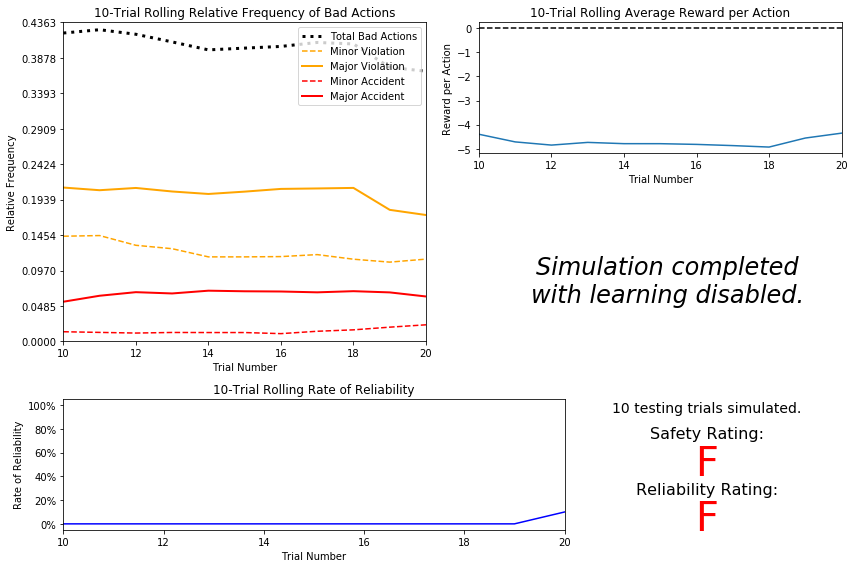

In [15]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
The driving agent is making bad decisions between 35-44 % of the time. Approximately 1 % of the time the driving agent is in a minor accident and approximately 5-6 % of the time the driving agent is in a major accident. Approximately 20 % of the bad decisions result in accidents. Considering the agent is driving randomly it makes sense that the 10-Trial Rolling Rate of Reliability is 0 % most of the time. The agent may arrive at the destination by making random moves, this happens only by chance not by correct policy. The 10-Trial Rolling Average Reward per Action shows that on average the the agent is receiving negative rewards for its actions. Considering that the rewards are negative and the percentage of bad actions is high,  this shows the agent is being penalized for its bad performance. As the number of trials increase the performance metrics stay around the same levels, this makes sense because the actions are random so most of the time the results will be within a range. This is like recording the value of a random variable over many trials like rolling a die. This Smartcab would definately not be safe and/or reliable for its passengers. The Smartcab almost never gets the passengers to the destination, and around 1 out of 20 moves of the Smartcab results in a major accident.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** 
The waypoint feature is most important when it comes to efficiency. In order to get to the destination the Smartcab has to follow the route, which is determined by the state of the waypoint. If the only features were inputs, the Smartcab could be safe but only arrive at the destination by chance and not by a correct policy. Therefore the waypoint is essential information for the agent to navigate to the destination

Regarding safety, the most important features are 'light', 'oncoming' and 'left'. If the agent makes a traffic violation such as running a red light the safety score will decline. The safety score can also be negatively affected if the agent fails to move at a green light. The 'oncoming' feature is important in the circumstance that the agent is making a left turn at a green light. The agent will have to make sure there is no oncoming traffic going 'forward' when making a left turn at a green light. If the agent makes a right at a red light, the agent will have to make sure there are no cars from the left going forward. I did not include the 'right' feature because if the agent and other agents are following the lights and rules it is unnecessary to consider the action of the agent to the right. This will also make for more efficient training because there will be fewer total states to to consider, this will allow for an optimal policy to be generated in less time.


To conclude, the 'waypoint' feature is the most important for reliablity, and the 'lights', 'oncoming' and 'left' are the most important safety features.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** The state space will be all combinations of 'light', 'oncoming', 'left', 'waypoint'. The total number of states can be calculated using the multiplication rule, 'light' can take on 2 values, 'oncoming' and 'left' can take on 4 values and 'waypoint' can take on 3 values. This means 96 total states are possible using these features for the state space (2 x 4 x 4 x 3 = 96). If four actions for the Smartcab are linked to the 96 states there are a total of 386 states. Around Four-hundred calculations that are not exponential complexity is not hard for a computer, however the Smartcab will probably not come across a state it has never been in for every move it takes. This can cause more time for the Smartcab to learn the correct policy, however I think that if the agent comes to an intersection around 2000 times it should be able to learn close to an optimal policy.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

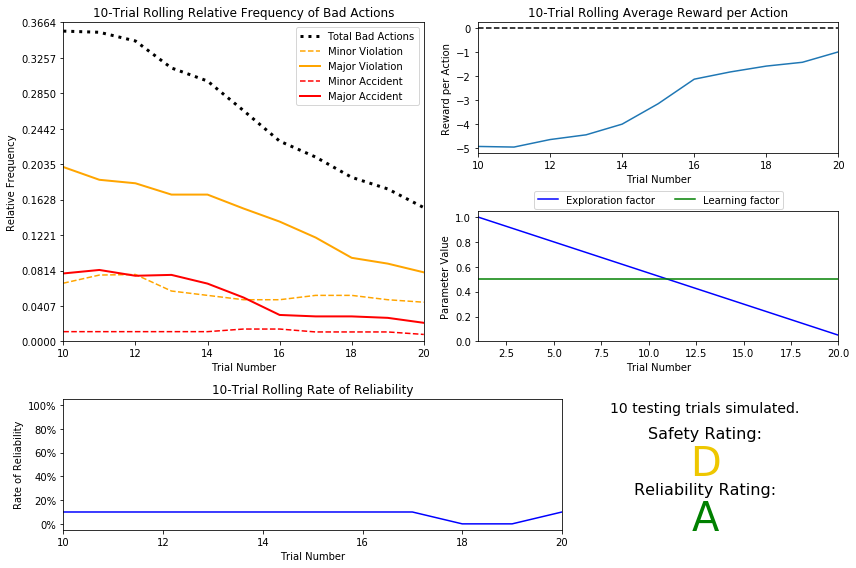

In [91]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** In the default learning simulation the Smartcab has a reliability rating of A and a safety rating of D. This shows a nice improvement over the no learning simulation where reliability and safety both had F ratings. The reliability rating of A is a significant improvement over the no learning simulation and the D rating for safety may be considered a minor improvement. What is more telling than the D rating for safety is the decline in total bad actions as more trials occur. This shows that the Smartcab is making better decisions over time due to taking advantage to the updated Q-values.

The agent required 20 trials before testing, this is because epsilon started out with a value of 1 and decreased by 0.05 every trial. Once the epsilon value is less than the tolerance which is 0.05 the testing stage begins (1 - (20 * (0.05)) == 0. The decaying function is accurately displayed in the parameters panel, it is the function f(x) = 1 - 0.5 * x.

As the number of trials increased the number of bad actions decreased. At trial 10 the relative frequency of total bad actions was apprximately 36% by the 20th trial the relative frequency of total bad actions was approximately 16%. The realtive frequency of major accidents decreased as the number of trials increased, starting out with a relative frequency of approximately 8% and by the 20th trial declined to a relative frequency of approximately 2%. The average reward per action increased as the number of training trials increased. The average reward per action at trial 10 was approximately -5, and by trial 20 the average reward per action increased to approximately -1. These metrics show that the Smartcab is improving it's policy over time and is significantly better than the no learning Smartcab. 

**('red', 'left', None, 'right')
 -- forward : -4.85
 -- None : 0.49
 -- right : 1.56
 -- left : -4.91**
 
 The above entry in the Q-table shows that the Smartcab learned the optimal policy for this state.



-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

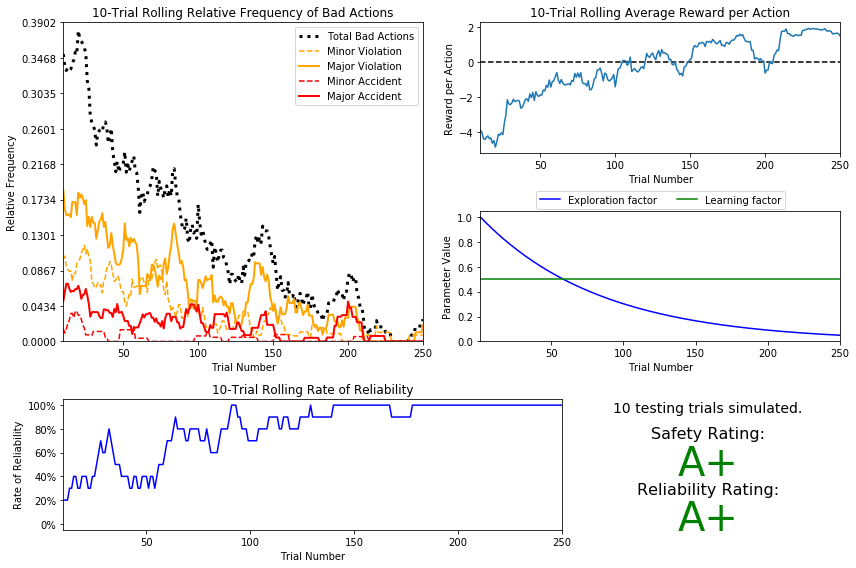

In [90]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** The function **f(t) = a ^ t, 0 < a < 1**, is the decaying function I chose. Since the constant 'a' started out with the value 0.988, it took 250 training trials before testing started. This is seen when raising 0.988 to the 250th power (0.988^250) < 0.05, the tolerance is 0.05 and testing begins when epsilon is lower than the tolerance value. A significant improvement was made with this Q-Learner compared to the Q-Learner in the previous section. The Smartcab went from having D in safety and an A in reliability, to A+ scores in safety and reliability. The Q-Learner did learn an appropriate policy, this is shown by the metrics in the above chart and observing the sim_improved-learning.txt file. I am satisfied with the safety and reliability ratings of the Smartcab, A+ ratings in both safety and reliability show that the Smartcab learned from acting in its environment. The reliabilty converging to 100% and bad actions converging to 0% further illustrate the agent learning the oprimal policy.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

In [88]:
# This function takes a given state and returns whether the move is valid when 
# operating under an optimal policy.

def optimal_action(light, oncoming_traffic, left_traffic, waypoint):
    
    if light == 'green':
        if waypoint == 'left':
            if oncoming_traffic != 'forward':
                return 'the optimal action for this state is "left"' 
            else:
                return 'the optimal action for this state is "forward"'
            
        elif waypoint == 'forward':
            return 'the optimal action for this state is "forward"'
        elif waypoint == 'right':
            return 'the optimal action for this state is "right"'
        
        
    elif light == 'red':
        if waypoint == 'right':
            if left_traffic != 'forward':
                return 'the optimal action for this state is "right"'
            else:
                return 'the optimal action for this state is "None"'
        elif waypoint == 'left':
            return 'the optimal action for this state is "None"'
        elif waypoint == 'forward':
            return 'the optimal action for this state is "None"'
        
    
    
            

In [89]:
optimal_action('green', None, None, 'left')

'the optimal action for this state is "left"'

**Answer:** 

**Optimal Policy**:
The above optimal policy function returns the optimal action for a particular state. There are a total of eight return statements, these statements inform what the agent should do for a given state. These eight statements can be thought of as eight leaves of a tree if this policy function was modeled with a decision tree. The dictionary below captures the optimal policy, there are two outer keys that correspond to the state of the light, and the dictionaries that correspond to the light keys contain keys that represent the waypoint, and the values contain the optimal actions for the agent. For some key-value pairs the optimal action is dependent on the state of the traffic. For example, if the light is green and the waypoint is left, the optimal action could either be to turn left, or to go forward. In the case that the state of the oncoming traffic is not forward the optimal action is to turn left. However since there is a penalty for not moving at a green light the next best move is forward. The reason this is the case is because the Smartcab does not have to yield to traffic if it goes forward and it will put the Smartcab at lesser disadvantage when it comes to distance from the destimation than turning right.

{'Green': {'forward': Agent goes forward, 'left': if oncoming != forward, the agent goes left, otherwise the Agent goes forward, 'right': Agent turns right }, 'Red': {'forward': Agent does None , 'left': Agent does None , 'right': if left != forward, Agent moves right, otherwise agent does None}}

Below are entries in the Q-table that were generated in the improved learning simulation. Entries in the tuple are light-color, action of oncoming traffic, action of left traffic, waypoint. There are Q-values that correspond to various actions for a given state. I will discuss the examples below.

**('green', 'left', 'left', 'right')
 -- forward : 0.63
 -- None : -2.33
 -- right : 2.38
 -- left : 0.00
 **
 
 In this case the light is green and the waypoint is right. The optimal action is right, right also has the highest Q-value. This shows that the agent learned the optimal policy for this state.
 
 **('red', None, 'left', 'right')
 -- forward : -23.76
 -- None : 0.09
 -- right : 1.95
 -- left : -16.80
 **
 
 In this case the light is red and the waypoint is right. The left traffic is going left so this means the optimal action for the agent is right. The right action has the highest Q-value which shows the agent learned the optimal policy for this state.
 
 **('green', 'left', 'forward', 'left')
 -- forward : 0.05
 -- None : -4.25
 -- right : -0.22
 -- left : 1.68
 **
 
 In this case the light is green and the waypoint is left. The oncoming traffic is turning left so the optimal action for this state is for the agent to make a left turn. Of all the actions left has the highest Q-value, this shows the agent learned the optimal policy for this state.
 
 
**('green', 'forward', 'left', 'left')
 -- forward : -0.06
 -- None : 0.00
 -- right : 0.86
 -- left : 0.00**
 
In the example above from the improved learning simulation the optimal action is forward. Forward does not have the highest Q-value, the highest Q-value corresponds to right. There are reasons this could be the case. There may have been too few opportunities to explore different actions for this particular state, as epsilon declines the agent becomes less likely to explore and more likely to pick the highest q-value action even if it is not optimal. It is also possible that the way the reward sysetm works that the agent will not arrive at optimal policy I have stated.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** 

(1) The fact that the destination is always changing invalidates adding a reward for reaching the Goal. If reaching a certain square/coordinate was was associated with a reward the agent would be inclined to move towards that square/coordinate, however if the goal keeps changing randomly then remembering the fastest route to a previous goal is of no benefit to getting to the current goal. 

(2) The Smartcab also does not look ahead to consider the value of future states, it only considers the current state of its environment. If the goal was fixed in one spot and there was a reward associated with it, the Smartcab could look ahead to possible squares it can land on and choose the one with the highest reward. In this project the Smartcab only considers information about its current state before choosing the action that has the highest Q-value. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.